<a href="https://colab.research.google.com/github/kiranmuloor/DataScience/blob/master/CNN/Statefarm/3_Statefarm_convne_augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:

train_dir="/content/drive/My Drive/Datascience/ClassWork/DeepLearning/CNN/Statefarms/train"
validation_dir="/content/drive/My Drive/Datascience/ClassWork/DeepLearning/CNN/Statefarms/validation"

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='categorical')

Found 2197 images belonging to 10 classes.
Found 2247 images belonging to 10 classes.


In [0]:
from keras.utils.np_utils import to_categorical
num_classes = len(validation_generator.class_indices)
validation_labels = validation_generator.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='sigmoid'))

In [11]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=10,
validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 1192s 12s/step - loss: 0.3310 - acc: 0.8945 - val_loss: 0.3106 - val_acc: 0.9000
Epoch 2/10
100/100 [==============================] - 131s 1s/step - loss: 0.2903 - acc: 0.9018 - val_loss: 0.1774 - val_acc: 0.9031
Epoch 3/10
100/100 [==============================] - 131s 1s/step - loss: 0.2323 - acc: 0.9146 - val_loss: 0.2238 - val_acc: 0.9215
Epoch 4/10
100/100 [==============================] - 131s 1s/step - loss: 0.1850 - acc: 0.9300 - val_loss: 0.2245 - val_acc: 0.9327
Epoch 5/10
100/100 [==============================] - 131s 1s/step - loss: 0.1391 - acc: 0.9457 - val_loss: 0.1121 - val_acc: 0.9513
Epoch 6/10
100/100 [==============================] - 132s 1s/step - loss: 0.1107 - acc: 0.9607 - val_loss: 0.0823 - val_acc: 0.9599
Epoch 7/10
100/100 [==============================] - 131s 1s/step - loss: 0.0843 - acc: 0.9714 - val_loss: 0.1756 - val_acc: 0.9679
Epoch 8/10
100/100 [==============================] - 131s 1s/step 

In [0]:
model.save('cats_and_dogs_small_2.h5')

Text(0.5, 1.0, 'Training and validation accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and validation loss')

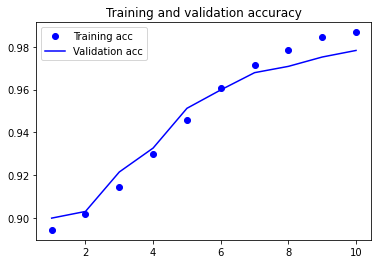

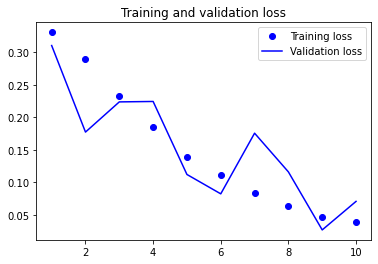

In [13]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()